**Importing Libraries**

In [ ]:
import seaborn 
import pandas as pd
import numpy as np
import tensorflow as tf
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.metrics import confusion_matrix
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
data, sampling_rate = librosa.load('/content/03-01-01-01-01-01-01.wav')

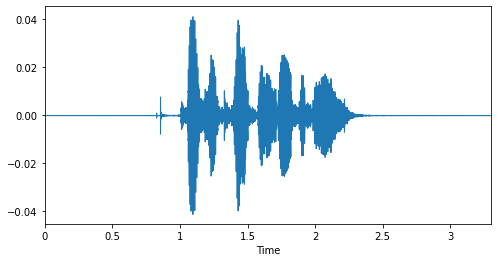

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(data, sr=sampling_rate)

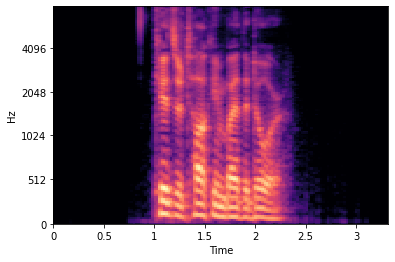

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

**Mounting drive to access the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount = True)


Mounted at /content/drive/


In [ ]:
!ls '/content/drive/My Drive'

 20115008_Akriti_Electrical.pdf
 20115008_Akriti_Jain_202_T6.pdf
 20115008_Akriti_Jain_een202_exp5.pdf
 20115008_Akriti_Jain_een202_exp6.pdf
'20115008 Akriti Jain EEN202 prac1.pdf'
 20115008_Akriti_Jain_een202_prac4.pdf
 20115008_Akriti_Jain_exp5.pdf
 Akriti_20115008_tut3_EEN202.pdf
'Akriti Class X Board Marksheet & Certificate.pdf'
 Akriti_Electrical.pdf
 Akriti_Jain_20115008_EEN202_tut2.pdf
 Akriti_Jain_20115008_een202_tut4.pdf
 Akriti_Jain_20115008_een202_tut5.pdf
 Akriti_Jain_20115008_tut1EEN202.pdf
 Akriti_Jain_tut_2.pdf
'and relay try.ms14'
 ANU-FRT.gdoc
 archive.zip
'audio_song (1).zip'
 Audio_Song_Actors_01-24.zip
 audio_song.zip
 Audio_Speech_Actors_01-24.zip
 Audio_Speech_Actors.zip
 audio_speech.zip
'Batch-1 girls.gsheet'
'Blank Quiz (1).gform'
'Blank Quiz.gform'
'B S Grewal.pdf'
'Business process manual.gdoc'
 Certificates.gdoc
 ClassList.xlsm
'Colab Notebooks'
'Colors trophy pics'
'Cp pics'
'CV - Akriti Jain.gdoc'
'CV - Akriti Jain.pdf'
'DAAD-WISE 2022.gdoc'
'deep learning

**Unzipping the datasets:**
*   Ravdess (speech and song)
*   Tess 



In [ ]:
!unzip '/content/drive/MyDrive/audio_song (1).zip'

Archive:  /content/drive/MyDrive/audio_song (1).zip
   creating: Audio_Song_Actors_01-24/Actor_01/
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-01-02-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: Audio_Song_Actors_01-24/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: Audio_Song_A

In [ ]:
!unzip '/content/drive/MyDrive/audio_speech.zip'

Archive:  /content/drive/MyDrive/audio_speech.zip
   creating: Audio_Speech_Actors_01-241/Actor_01/
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Audio_Speech_Actors_01-241/Actor_01/03-01-02-02-02-

In [ ]:
!unzip '/content/drive/MyDrive/tess.zip'

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
emotion_number_speech= []
for speech in os.listdir('/content/Audio_Speech_Actors_01-241'):
  for wav in os.listdir(os.path.join('/content/Audio_Speech_Actors_01-241', speech)):
    emotion_number_speech.append(wav.split('-')[2])
  

In [ ]:
len(emotion_number_speech)

1440

In [ ]:
emotion_number_song= []
for song in os.listdir('/content/Audio_Song_Actors_01-24'):
  for wav in os.listdir(os.path.join('/content/Audio_Song_Actors_01-24', song)):
    emotion_number_song.append(wav.split('-')[2])


In [ ]:
len(emotion_number_song)

1012

In [ ]:
ravdess_emo_lst = emotion_number_speech + emotion_number_song
print(len(ravdess_emo_lst))

2452


In [ ]:
Emotions = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

In [ ]:
rav_dict = {Emotions[i]: ravdess_emo_lst.count(i) for i in list(Emotions.keys())}

In [ ]:
rav_dict

{'angry': 376,
 'calm': 376,
 'disgust': 192,
 'fearful': 376,
 'happy': 376,
 'neutral': 188,
 'sad': 376,
 'surprised': 192}

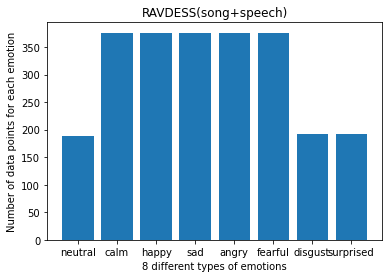

In [ ]:
plt.bar(rav_dict.keys(), rav_dict.values())
plt.title('RAVDESS(song+speech)')
plt.xlabel('8 different types of emotions')
plt.ylabel('Number of data points for each emotion')
plt.show()

In [ ]:
tess= 'OAF_Fear'
len(os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)))

200

In [ ]:
tess_dict_old = {}
for tess in os.listdir('/content/TESS Toronto emotional speech set data'):
  for item in os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)):
    if tess.split('_')[0]=='OAF':

      tess_dict_old.update({tess.split('_')[1]: len(os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)))})
print(tess_dict_old)

{'Fear': 200, 'Sad': 200, 'Pleasant': 200, 'happy': 200, 'neutral': 200, 'angry': 200, 'disgust': 200}


In [ ]:
tess_dict_young = {}
for tess in os.listdir('/content/TESS Toronto emotional speech set data'):
  for item in os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)):
    if tess.split('_')[0]=='YAF':

      tess_dict_young.update({tess.split('_')[1]: len(os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)))})
print(tess_dict_young)

{'neutral': 200, 'pleasant': 200, 'disgust': 200, 'fear': 200, 'happy': 200, 'sad': 200, 'angry': 200}


In [ ]:
tess_dict ={}

for i in tess_dict_old.keys():
  for j in tess_dict_young.keys():
    if i.lower()==j.lower():
      tess_dict.update({i.lower(): tess_dict_old[i]+tess_dict_young[j]})
print(tess_dict)

{'fear': 400, 'sad': 400, 'pleasant': 400, 'happy': 400, 'neutral': 400, 'angry': 400, 'disgust': 400}


[]

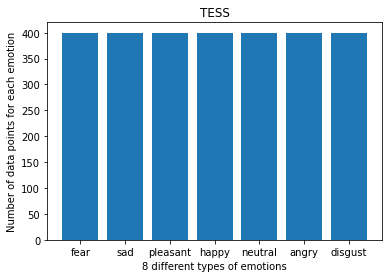

In [ ]:
plt.bar(tess_dict.keys(),tess_dict.values())
plt.title('TESS')
plt.xlabel('8 different types of emotions')
plt.ylabel('Number of data points for each emotion')
plt.plot()

In [ ]:
rav_dict.items()

dict_items([('neutral', 188), ('calm', 376), ('happy', 376), ('sad', 376), ('angry', 376), ('fearful', 376), ('disgust', 192), ('surprised', 192)])

In [ ]:
tess_dict.keys()

dict_keys(['fear', 'sad', 'pleasant', 'happy', 'neutral', 'angry', 'disgust'])

In [ ]:
labels = {}
for r in rav_dict.keys():
  for t in tess_dict.keys():
    if r[0]==t[0]:
      labels.update({r: rav_dict[r]+ tess_dict[t]})
labels.update({'calm': 376})

print(labels)

{'neutral': 588, 'happy': 776, 'sad': 776, 'angry': 776, 'fearful': 776, 'disgust': 592, 'surprised': 592, 'calm': 376}


In [ ]:
labels['fear'] = labels.pop('fearful')
labels

{'angry': 776,
 'calm': 376,
 'disgust': 592,
 'fear': 776,
 'happy': 776,
 'neutral': 588,
 'sad': 776,
 'surprised': 592}

[]

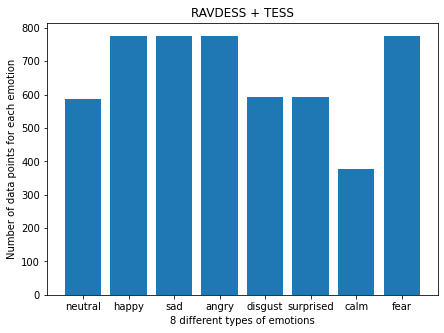

In [ ]:
#plotting final data labels
plt.figure(figsize=(7, 5))
plt.bar(labels.keys(), labels.values())
plt.title('RAVDESS + TESS')
plt.xlabel('8 different types of emotions')
plt.ylabel('Number of data points for each emotion')
plt.plot()

In [ ]:
print('total number of data points :', sum(list(labels.values())))

total number of data points : 5252


In [ ]:
pip install librosa soundfile numpy sklearn pyaudio

  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-2crc_i_f/pyaudio_f3df985182524804ac63bef230322ab7/setup.py'"'"'; __file__='"'"'/tmp/pip-install-2crc_i_f/pyaudio_f3df985182524804ac63bef230322ab7/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-y45800sj/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyaudio Check the logs for full command output.


In [ ]:
import librosa
import soundfile
import librosa.display

In [ ]:
from tqdm import tqdm

In [ ]:
mel_tess =[]
mfcc_tess =[]

for tess in tqdm(os.listdir('/content/TESS Toronto emotional speech set data')):
  for i in os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)):

    y, sr = librosa.load(os.path.join('/content/TESS Toronto emotional speech set data', tess, i))
    mel_tess.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_tess.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  

print(len(mel_tess))
print(len(mfcc_tess))

100%|██████████| 14/14 [05:36<00:00, 24.07s/it]

2800
2800


In [ ]:
mfcc_tess[29].shape

(13,)

In [ ]:
mel_tess[20].shape

(128,)

In [ ]:
mel_song =[]
mfcc_song =[]

for song in tqdm(os.listdir('/content/Audio_Song_Actors_01-24')):
  for i in os.listdir(os.path.join('/content/Audio_Song_Actors_01-24', song)):

    y, sr = librosa.load(os.path.join('/content/Audio_Song_Actors_01-24', song, i))
    mel_song.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_song.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  
print('****')
print(len(mel_song))
print(len(mfcc_song))

100%|██████████| 24/24 [05:27<00:00, 13.65s/it]

****
1012
1012


In [ ]:
mel_speech =[]
mfcc_speech =[]

for speech in tqdm(os.listdir('/content/Audio_Speech_Actors_01-241')):
  for i in os.listdir(os.path.join('/content/Audio_Speech_Actors_01-241', speech)):

    y, sr = librosa.load(os.path.join('/content/Audio_Speech_Actors_01-241', speech, i))
    mel_speech.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_speech.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  
print('****')
print(len(mel_speech))
print(len(mfcc_speech))

100%|██████████| 24/24 [06:28<00:00, 16.19s/it]

****
1440
1440


In [ ]:
from scipy import hstack
from scipy import vstack

In [ ]:
for i in mel_tess:
  i.reshape(1,-1)
mel_feat_tess = vstack((mel_tess))
mel_feat_tess.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  This is separate from the ipykernel package so we can avoid doing imports until


(2800, 128)

In [ ]:
for i in mfcc_tess:
  i.reshape(1,-1)
mfcc_feat_tess = vstack((mfcc_tess))
mfcc_feat_tess.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  This is separate from the ipykernel package so we can avoid doing imports until


(2800, 13)

In [ ]:
feat_tess = hstack((mel_feat_tess, mfcc_feat_tess))
print(feat_tess.shape)

(2800, 141)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  """Entry point for launching an IPython kernel.


In [ ]:
# for speech
for i in mel_speech:
  i.reshape(1,-1)
mel_feat_speech = vstack((mel_speech))
print(mel_feat_speech.shape)

for j in mfcc_speech:
  j.reshape(1,-1)
mfcc_feat_speech = vstack((mfcc_speech))
print(mfcc_feat_speech.shape)

feat_speech = hstack((mel_feat_speech, mfcc_feat_speech))
print(feat_speech.shape)

(1440, 128)
(1440, 13)
(1440, 141)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  if sys.path[0] == '':


In [ ]:
# for song
for i in mel_song:
  i.reshape(1,-1)
mel_feat_song = vstack((mel_song))
print(mel_feat_song.shape)

for j in mfcc_song:
  j.reshape(1,-1)
mfcc_feat_song = vstack((mfcc_song))
print(mfcc_feat_song.shape)

feat_song = hstack((mel_feat_song, mfcc_feat_song))
print(feat_song.shape)

(1012, 128)
(1012, 13)
(1012, 141)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  if sys.path[0] == '':


In [ ]:
features = vstack((feat_tess, feat_song, feat_speech ))
features.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  """Entry point for launching an IPython kernel.


(5252, 141)

In [ ]:
# Creating a Dataframe
#1. Tess

tess_emotion=[]
tess_path = []

for tess in tqdm(os.listdir('/content/TESS Toronto emotional speech set data')):
  for item in os.listdir(os.path.join('/content/TESS Toronto emotional speech set data', tess)):
    tess_path.append(os.path.join('/content/TESS Toronto emotional speech set data', tess, item))
    tess_emotion.append(tess.split('_')[1])

print(len(tess_emotion))
print(len(tess_path)) 

print(tess_emotion[0:5])
print(tess_path[0:5])

100%|██████████| 14/14 [00:00<00:00, 1256.40it/s]

2800
2800
['Fear', 'Fear', 'Fear', 'Fear', 'Fear']
['/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_luck_fear.wav', '/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_should_fear.wav', '/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_bought_fear.wav', '/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_reach_fear.wav', '/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_hit_fear.wav']


In [ ]:
#2. Speech

speech_path = []
speech_emotion=[]

for speech in tqdm(os.listdir('/content/Audio_Speech_Actors_01-241')):
  for item in os.listdir(os.path.join('/content/Audio_Speech_Actors_01-241', speech)):
    speech_path.append(os.path.join('/content/Audio_Speech_Actors_01-241', speech, item))
    speech_emotion.append(item.split('-')[2])

print(len(speech_path))
print(len(speech_emotion)) 

print(speech_path[0:5])
print(speech_emotion[0:5])

100%|██████████| 24/24 [00:00<00:00, 2346.19it/s]

1440
1440
['/content/Audio_Speech_Actors_01-241/Actor_17/03-01-06-01-02-02-17.wav', '/content/Audio_Speech_Actors_01-241/Actor_17/03-01-05-02-02-02-17.wav', '/content/Audio_Speech_Actors_01-241/Actor_17/03-01-08-02-01-01-17.wav', '/content/Audio_Speech_Actors_01-241/Actor_17/03-01-08-01-02-01-17.wav', '/content/Audio_Speech_Actors_01-241/Actor_17/03-01-02-02-01-02-17.wav']
['06', '05', '08', '08', '02']


In [ ]:
#2. Song
song_path = []
song_emotion=[]

for song in tqdm(os.listdir('/content/Audio_Song_Actors_01-24')):
  for item in os.listdir(os.path.join('/content/Audio_Song_Actors_01-24', song)):
    song_path.append(os.path.join('/content/Audio_Song_Actors_01-24', song, item))
    song_emotion.append(item.split('-')[2])

print(len(song_path))
print(len(song_emotion)) 

print(song_path[0:5])
print(song_emotion[0:5])

100%|██████████| 24/24 [00:00<00:00, 3107.95it/s]

1012
1012
['/content/Audio_Song_Actors_01-24/Actor_17/03-02-03-01-02-01-17.wav', '/content/Audio_Song_Actors_01-24/Actor_17/03-02-03-02-02-01-17.wav', '/content/Audio_Song_Actors_01-24/Actor_17/03-02-06-02-01-01-17.wav', '/content/Audio_Song_Actors_01-24/Actor_17/03-02-06-01-01-01-17.wav', '/content/Audio_Song_Actors_01-24/Actor_17/03-02-05-02-02-02-17.wav']
['03', '03', '06', '06', '05']


In [ ]:
final_emotion = tess_emotion+ song_emotion + speech_emotion
print('final class label', len(final_emotion))
print(final_emotion[5000:5010])

final class label 5252
['07', '03', '04', '06', '02', '06', '04', '03', '02', '06']


In [ ]:
final_path = tess_path + song_path + speech_path
print('final paths of datapoints', len(final_path))
print(final_path[5000:5010])

final paths of datapoints 5252
['/content/Audio_Speech_Actors_01-241/Actor_04/03-01-07-01-02-01-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-03-01-01-01-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-04-02-02-02-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-06-01-02-01-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-02-02-01-01-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-06-02-02-02-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-04-01-02-02-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-03-01-02-02-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-02-01-01-02-04.wav', '/content/Audio_Speech_Actors_01-241/Actor_04/03-01-06-02-01-01-04.wav']


In [ ]:
df = pd.DataFrame(data={'path': final_path, 'emotions': final_emotion})
df.loc[1000:1050, :]

,path,emotions
1000,/content/TESS Toronto emotional speech set dat...,pleasant
1001,/content/TESS Toronto emotional speech set dat...,pleasant
1002,/content/TESS Toronto emotional speech set dat...,pleasant
1003,/content/TESS Toronto emotional speech set dat...,pleasant
1004,/content/TESS Toronto emotional speech set dat...,pleasant
1005,/content/TESS Toronto emotional speech set dat...,pleasant
1006,/content/TESS Toronto emotional speech set dat...,pleasant
1007,/content/TESS Toronto emotional speech set dat...,pleasant
1008,/content/TESS Toronto emotional speech set dat...,pleasant
1009,/content/TESS Toronto emotional speech set dat...,pleasant


In [ ]:
df['emotions'].unique()

array(['Fear', 'Sad', 'Pleasant', 'happy', 'neutral', 'pleasant',
       'disgust', 'fear', 'angry', 'sad', '03', '06', '05', '02', '01',
       '04', '08', '07'], dtype=object)

In [ ]:
labels

{'angry': 776,
 'calm': 376,
 'disgust': 592,
 'fear': 776,
 'happy': 776,
 'neutral': 588,
 'sad': 776,
 'surprised': 592}

In [ ]:
Emotions

{'01': 'neutral',
 '02': 'calm',
 '03': 'happy',
 '04': 'sad',
 '05': 'angry',
 '06': 'fearful',
 '07': 'disgust',
 '08': 'surprised'}

In [ ]:
df =df.replace({'emotions': {'01': 'neutral',
                             '02': 'calm',
 '03': 'happy',
 '04': 'sad',
 '05': 'angry',
 '06': 'fear',
 '07': 'disgust',
 '08': 'surprised',
 'Pleasant': 'surprised',
 'pleasant': 'surprised',
 'Fear': 'fear',
 'Sad':'sad'}})

df['emotions'].unique()

array(['fear', 'sad', 'surprised', 'happy', 'neutral', 'disgust', 'angry',
       'calm'], dtype=object)

In [ ]:
df_feat = pd.DataFrame(features)
df_feat.shape

(5252, 141)

In [ ]:
df_new= pd.concat([df, df_feat], axis=1)
print(df_new.shape)
df_new.head()

(5252, 143)


,path,emotions,0,1,2,3,4,5,6,7,...,131,132,133,134,135,136,137,138,139,140
0,/content/TESS Toronto emotional speech set dat...,fear,0.038836,0.001351,0.000122,0.000094,0.000082,0.000109,0.000131,0.010106,...,-7.802627,-5.663867,1.815711,-11.933131,0.260962,-14.271884,0.479917,-17.937149,-0.553905,-5.520595
1,/content/TESS Toronto emotional speech set dat...,fear,0.033329,0.001802,0.000376,0.000219,0.000177,0.000221,0.000172,0.000348,...,4.791201,2.730196,-1.849497,-14.914581,-1.045356,-21.117367,-0.364469,-17.442509,-4.890612,-6.637499
2,/content/TESS Toronto emotional speech set dat...,fear,0.070026,0.012028,0.000679,0.000207,0.000239,0.000250,0.000182,0.000508,...,-11.378193,-10.549060,3.200278,-9.504709,5.015046,-15.660679,-1.161436,-16.607874,-8.045524,-9.639078
3,/content/TESS Toronto emotional speech set dat...,fear,0.029125,0.001011,0.000107,0.000045,0.000037,0.000081,0.000089,0.001285,...,3.182581,1.936049,7.989650,-7.896986,-6.998014,-15.484761,-2.996778,-23.241341,-3.513224,-6.148154
4,/content/TESS Toronto emotional speech set dat...,fear,0.029257,0.001412,0.000230,0.000143,0.000133,0.000175,0.000187,0.001942,...,4.208165,5.467172,-0.262594,-18.116877,-0.803111,-14.090402,1.500115,-19.420794,-5.759678,-5.676891


In [ ]:
df_new.shape

(5252, 143)

In [ ]:

df_new = df_new[df_new['emotions']!='calm']
df_new.shape

(4876, 143)

In [ ]:
# EXPORT TO CSV
df_new.to_csv('/content/drive/MyDrive/Self Case Study/data.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = df[df['emotions']!='calm']

In [ ]:
class_label = df['emotions']
df_final= df_new.drop(columns= ['emotions', 'path'])
print(class_label.shape)
print(df_final.shape)

(4876,)
(4876, 141)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_final, class_label, test_size=0.20, stratify= class_label)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 141)
(976, 141)
(3900,)
(976,)


In [ ]:
x_train.to_csv('/content/drive/MyDrive/Self Case Study/x_train.csv')

In [ ]:
from tensorflow.keras.utils import to_categorical
lb= LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))

print(y_train.shape)
print(y_test.shape)
print(y_train[0:5])
print(y_test[0:5])

(3900, 7)
(976, 7)
[[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(3900, 141)
(976, 141)


In [ ]:
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
print(x_train.shape)
print(x_test.shape)

(3900, 141, 1)
(976, 141, 1)


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

In [ ]:
#building baseline 1d cnn model

#tensorflow.keras.backend.clear_session()

model = Sequential()
model.add(Conv1D(64, kernel_size=(8), activation='relu', input_shape=(x_train.shape[1],1)))

model.add(Conv1D(128, kernel_size=(8),activation='relu'))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Dropout(0.2))

model.add(Conv1D(128, kernel_size=(8),activation='relu'))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 134, 64)           576       
                                                                 
 conv1d_1 (Conv1D)           (None, 127, 128)          65664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           131200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                    

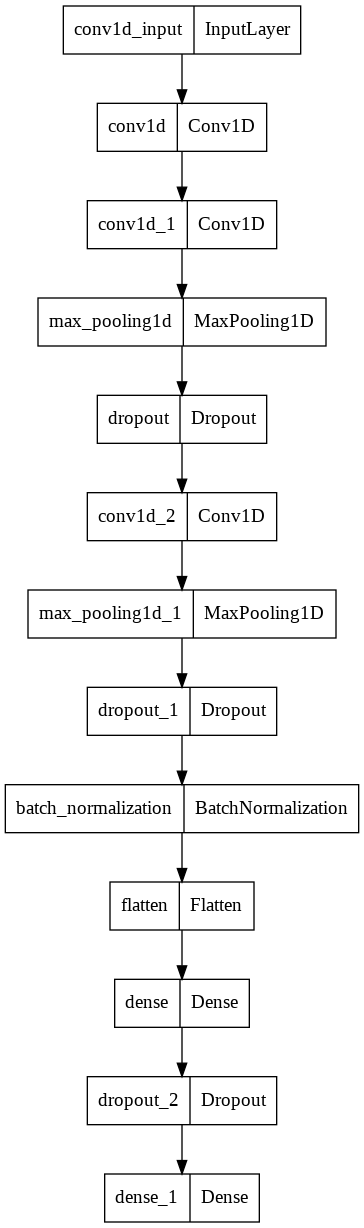

In [ ]:
plot_model(model)

In [ ]:
# Callbacks
import h5py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score

class F1(Callback):

  def __init__(self,x_train, y_train,x_test, y_test):
      self.x = x_train
      self.y = y_train
      self.x_val = x_test
      self.y_val = y_test

  #def on_train_begin(self, logs={}):
    #self.val_f1s = []
   
  
  def on_epoch_end(self, epoch, logs={}):

    val_predict = (np.asarray(self.model.predict(self.x_val))).round()
    val_targ = self.y_val

    _val_I'm on f1 = round(f1_score(val_targ, val_predict, average= 'micro'), 4)
    
    #self.val_f1s.append(_val_f1)
    
    print('f1_score:{}'.format(_val_f1))
    
F1 = F1(x_train, y_train,x_test, y_test)

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor= 'f1_score') 

In [ ]:
all= [F1,mc]

In [ ]:
# compiling and fitting
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=[tensorflow.keras.metrics.Precision()])
history= model.fit(x_train, y_train,batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks= all)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
122/122 [==============================] - 14s 98ms/step - loss: 1.7631 - precision: 0.7754 - val_loss: 1.8955 - val_precision: 0.0000e+00
Epoch 2/50
122/122 [==============================] - 11s 91ms/step - loss: 1.5289 - precision: 0.8589 - val_loss: 1.7919 - val_precision: 1.0000
Epoch 3/50
122/122 [==============================] - 11s 89ms/step - loss: 1.3389 - precision: 0.8712 - val_loss: 1.6019 - val_precision: 0.9444
Epoch 4/50
122/122 [==============================] - 11s 89ms/step - loss: 1.2038 - precision: 0.8712 - val_loss: 1.3542 - val_precision: 0.9557
Epoch 5/50
122/122 [==============================] - 11s 90ms/step - loss: 1.1101 - precision: 0.8755 - val_loss: 1.1294 - val_precision: 0.9480
Epoch 6/50
122/122 [==============================] - 11s 90ms/step - loss: 1.0253 - precision: 0.8758 - val_loss: 0.9798 - val_precision: 0.9548
Epoch 7/50
122/122 [==============================] - 11s 90ms/step - loss: 0.9596 - precision: 0.8888 - val_loss: 0.934

In [ ]:
cnn_model= tensorflow.keras.models.load_model('/content/best_model.h5')

In [ ]:
cnn_model.save('/content/drive/MyDrive/Self Case Study/cnn_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Self Case Study/cnn_model/assets


In [ ]:
model.predict(x_test).shape

(976, 7)

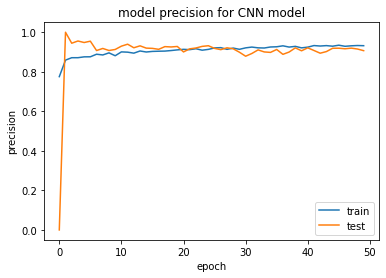

In [ ]:
# precion graph
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision for CNN model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

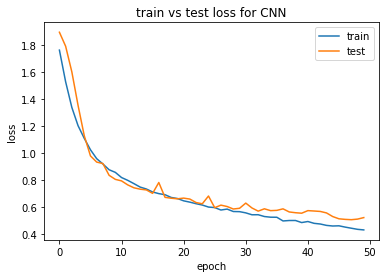

In [ ]:
# loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs test loss for CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

31/31 [==============================] - 1s 42ms/step - loss: 0.5234 - precision: 0.9068
Loss of the model is -  0.5233508944511414
31/31 [==============================] - 1s 41ms/step - loss: 0.5234 - precision: 0.9068
Accuracy of the model is -  90.68322777748108 %


In [ ]:
# converting y_pred into actual classes for CNN
y_pred = model.predict(x_test)
y_pred= y_pred.argmax(axis=1)

y_pred = y_pred.astype(int)

y_pred = (lb.inverse_transform((y_pred)))

prediction = pd.DataFrame({'predictions': y_pred})

prediction.head()

,predictions
0,fear
1,sad
2,disgust
3,disgust
4,happy


In [ ]:
#converting y_true into original labels for CNN

y_true = y_test.argmax(axis=1)
y_true = y_true.astype(int)
y_true = (lb.inverse_transform((y_true)))

actual = pd.DataFrame({'actual': y_true})
actual.head()

,actual
0,disgust
1,angry
2,disgust
3,disgust
4,happy


In [ ]:
true_vs_pred = pd.concat([actual, prediction], axis=1)
true_vs_pred.head()

,actual,predictions
0,disgust,fear
1,angry,sad
2,disgust,disgust
3,disgust,disgust
4,happy,happy


In [ ]:
class_label.unique()

array(['fear', 'sad', 'surprised', 'happy', 'neutral', 'disgust', 'angry'],
      dtype=object)

In [ ]:
# precion recall and f1_score report for cnn
from sklearn.metrics import classification_report
print(classification_report(actual, prediction, target_names = classes))

              precision    recall  f1-score   support

        fear       0.89      0.81      0.85       155
         sad       0.88      0.71      0.78       119
   surprised       0.81      0.75      0.78       155
       happy       0.77      0.82      0.80       155
     neutral       0.89      0.92      0.91       118
     disgust       0.71      0.85      0.77       155
       angry       0.77      0.80      0.79       119

    accuracy                           0.81       976
   macro avg       0.82      0.81      0.81       976
weighted avg       0.81      0.81      0.81       976



In [ ]:
from tensorflow.keras.models import Model
from tensorflow import keras

In [ ]:
predictions = model.evaluate(x_test, y_test, batch_size=32, verbose=2)

31/31 - 1s - loss: 0.5234 - precision: 0.9068 - 521ms/epoch - 17ms/step


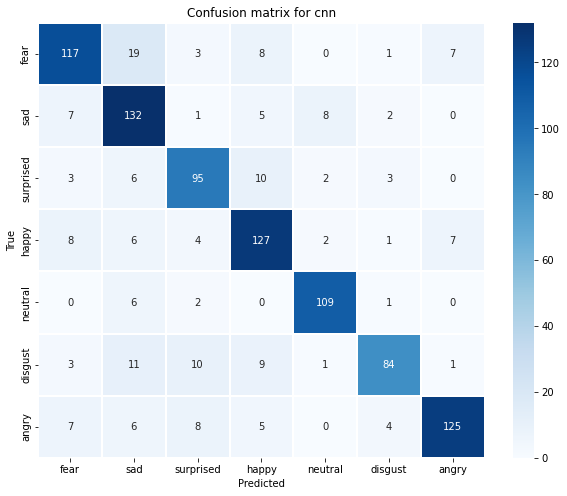

In [ ]:
# Analysis with Confusion Matrix of CNN

#plotting confusion matrix for cnn

classes = list(class_label.unique())
cm  = confusion_matrix(actual, prediction, labels= classes)
cm = pd.DataFrame(cm , index = classes , columns = classes)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for cnn')
plt.show()